# Working with real data

In this example, we will work with an RXTE observation of GRS 1915+105. The obsid is 91701-01-55-00. We are only looking at one orbit of three for this example.

## Data

The lightcurve for the example has already been extracted with 1/128s time resolution and uses the 2-30keV energy range. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Custom module by K. Arur, see BispecAnalysis.py for details
from BispecAnalysis import LightCurve, BispectralAnalysis


In [2]:
# Read in the flux and errors the data
lc = LightCurve.from_file('grs1915_data.txt')
ct = lc.data
t = lc.times
err = np.sqrt(ct)
dt = lc.dt

#Check that everything is as expected
print('Time resolution is', dt, 'seconds')
print('Length of light curve is', len(ct))


Time resolution is 0.0078125 seconds
Length of light curve is 409472


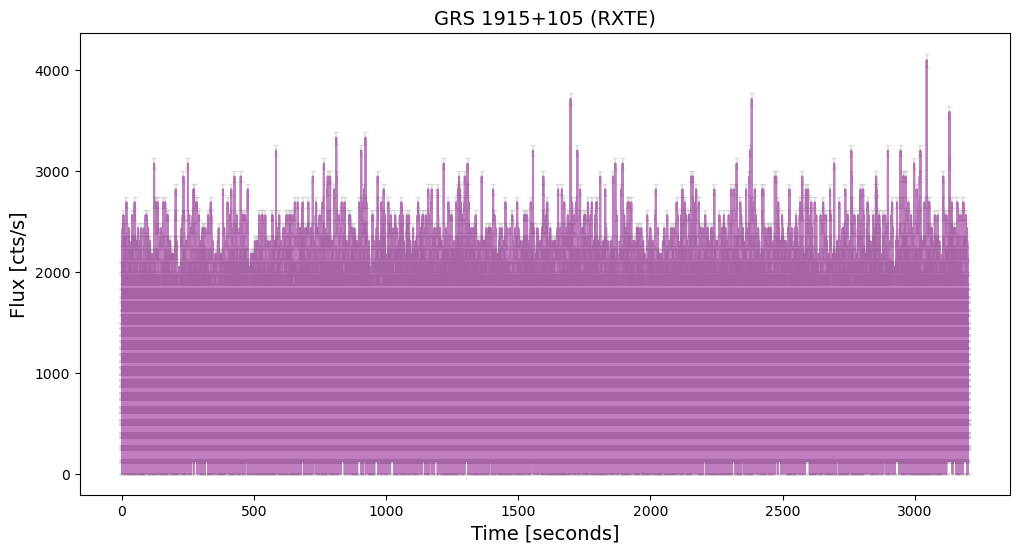

In [3]:
# Plot the light curve
plt.figure(figsize=[12,6])
plt.errorbar(t, ct, yerr=err,
            color='purple', ecolor='0.8', alpha=0.5, capsize=2.0)
plt.title('GRS 1915+105 (RXTE)', fontsize=14)
plt.ylabel('Flux [cts/s]', fontsize=14)
plt.xlabel('Time [seconds]', fontsize=14)
plt.show()

Let us now generate the power spectrum and plot it

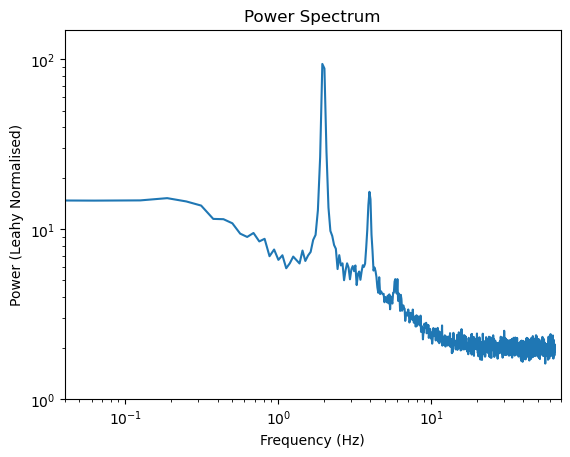

In [4]:
seglength = 2048
analysis = BispectralAnalysis(lc)

freqs, power, err = analysis.power_spectrum(seglength, normalization='leahy')

####Plot power spectrum
plt.loglog(freqs, power)
plt.title("Power Spectrum")
plt.xlim([4e-2,7e1])
plt.ylim([1,150])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (Leahy Normalised)")
plt.show()


In [5]:
f1, bicoher, bicoher_err, logbicoher, biphase = analysis.bispectrum(seglength)

Starting segment: 1 /  199
Starting segment: 2 /  199
Starting segment: 3 /  199
Starting segment: 4 /  199
Starting segment: 5 /  199
Starting segment: 6 /  199
Starting segment: 7 /  199
Starting segment: 8 /  199
Starting segment: 9 /  199
Starting segment: 10 /  199
Starting segment: 11 /  199
Starting segment: 12 /  199
Starting segment: 13 /  199
Starting segment: 14 /  199
Starting segment: 15 /  199
Starting segment: 16 /  199
Starting segment: 17 /  199
Starting segment: 18 /  199
Starting segment: 19 /  199
Starting segment: 20 /  199
Starting segment: 21 /  199
Starting segment: 22 /  199
Starting segment: 23 /  199
Starting segment: 24 /  199
Starting segment: 25 /  199
Starting segment: 26 /  199
Starting segment: 27 /  199
Starting segment: 28 /  199
Starting segment: 29 /  199
Starting segment: 30 /  199
Starting segment: 31 /  199
Starting segment: 32 /  199
Starting segment: 33 /  199
Starting segment: 34 /  199
Starting segment: 35 /  199
Starting segment: 36 /  199
S

/Users/karur/Desktop/KA/BispecAnalysis.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoher[r][c] = (abs(bspec[r][c]))**2.0 / (bcoha[r][c]*bcohb[r][c])
/Users/karur/Desktop/KA/BispecAnalysis.py:172: RuntimeWarning: divide by zero encountered in log10
  logbicoher = np.log10(bicoher)


Now we can check if there is any phase coupling among the harmonics. As an example, let us choose $f_1$ = 2Hz and $f_2$ = 2Hz. Then $f_1 + f_2$ = 4Hz

In [14]:
foi1 = 2 #frequency 1 of interest
foi2 = 2 #frequency 2 of interest

bin_width = f1[1]-f1[0]
boi1 = int(foi1/bin_width)
boi2 = int(foi2/bin_width)

#print('Bins are', boi1, boi2)

print('Bicoherence is', bicoher[boi1-1][boi2-1])
print('Bicoherence Error is', bicoher_err[boi1-1][boi2-1])

Bicoherence is 0.3464697637968993
Bicoherence Error is 0.03238057747627067


We have multiple harmonics here. So we can also see what coupling exists between the fundamental, second and third harmonic by setting $f_1$ = 2Hz and $f_2$ = 4Hz, such that $f_1 + f_2$ = 6Hz

In [15]:
foi1 = 2 #frequency 1 of interest
foi2 = 4 #frequency 2 of interest

boi1 = int(foi1/bin_width)
boi2 = int(foi2/bin_width)

print('Bicoherence is', bicoher[boi1-1][boi2-1])
print('Bicoherence Error is', bicoher_err[boi1-1][boi2-1])

Bicoherence is 0.12529610351038595
Bicoherence Error is 0.027860891177121882


For the above quick checks, we are just using a single frequency bin where the QPO peak exists. But since the QPO peaks have finite width, you can average over the nearby frequency bins too. 

While we can retrieve the values for each triplet of frequencies we are interested in, there is a lot of information in these matrices. An efficient way to see all the information at a glance is to plot the contours of the logbicoherence. 

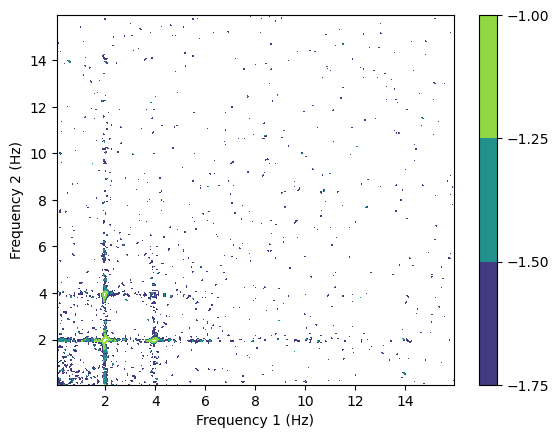

In [34]:
####Plot countour plot of bicoherence
xx,yy = np.meshgrid(f1,f1, indexing='ij')
CS = plt.contourf(xx, yy, logbicoher, levels=[-1.75,-1.5,-1.25,-1])
CB = plt.colorbar(CS)
plt.xlabel("Frequency 1 (Hz)")
plt.ylabel("Frequency 2 (Hz)")
plt.show()

You can see here that we have a "cross" pattern. 

For completeness, we can also plot the biphase, and retrieve the phase difference between harmonics using the same steps as in the first tutorial. 

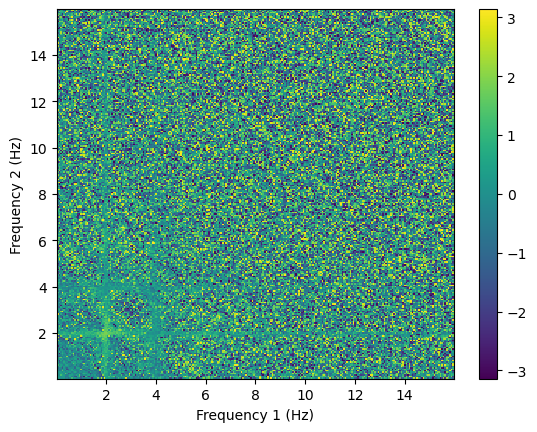

In [17]:
####Plot biphase
plt.pcolormesh(f1,f1,biphase)
plt.xlabel("Frequency 1 (Hz)")
plt.ylabel("Frequency 2 (Hz)")
plt.colorbar()
plt.show()

In [18]:
foi1 = 2 #frequency 1 of interest
foi2 = 2 #frequency 2 of interest

boi1 = int(foi1/bin_width)
boi2 = int(foi2/bin_width)

print('Biphase is', biphase[boi1-1][boi2-1]) #-1 because python starts counting from 0
num_segments = 199
variance_biphase = (1.0/num_segments)*((1.0/(bicoher[boi1-1][boi2-1]) - 1.0))
print('Error on biphase is', np.sqrt(variance_biphase))

Biphase is 1.885265383583791
Error on biphase is 0.09735844628902977


## Some common pitfalls to keep in mind

### Poisson Noise

In this example, we are looking at frequencies ~2-6 Hz where the power is dominated by the QPO. However, it must be noted that the bispectrum is affected by Poisson noise. So particularly for work at higher frequencies, a Poisson subtracted estimate of the powerspectrum can be used to normalize the bicoherence.

Deadtime (especially in working with NuSTAR data) can also affect bispectral estimates. For this, the bispectrum can be calculated between FPM A and FPM B. See Nathan et. al 2022 for more details.

### Non-stationarity

As the bispectrum is averaged over multiple segments, if the time series is non-stationary, the underlying phase coupling and non-Gaussian characteristics would change rather than remaining constant, affecting our measurements. 


For QPO observations, if QPO frequency is drifting significantly over the course of the observation, this can smear out the results across different bins and yield a lower estimate. 


The bispectrum can also be used to detect non-stationarity of the underlying signal. 

C. M. Pike, J. A. Tague and E. J. Sullivan, "Bispectral detection of nonstationary signals new theoretical results," [1991 Proceedings] The Twenty-Third Southeastern Symposium on System Theory, Columbia, SC, USA, 1991, pp. 264-267, doi: 10.1109/SSST.1991.138560.

### Be also mindful of

- Drop outs in light curve
- QPO Frequency drifts
  

